<a href="https://colab.research.google.com/github/roldugina/freecodecamp_data_analysis_projects/blob/main/medical_data_visualizer/medical_examination.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/roldugina/freecodecamp_data_analysis_projects/main/medical_data_visualizer/medical_examination.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [4]:
#define masks

mask_ap=(df['ap_hi']>=df['ap_lo'])

height_2_5=np.percentile(df['height'],2.5)
height_97_5=np.percentile(df['height'],97.5)
mask_height=(df['height']>=height_2_5)&(df['height']<=height_97_5)

weight_2_5=np.percentile(df['weight'],2.5)
weight_97_5=np.percentile(df['weight'],97.5)
mask_weight=(df['weight']>=weight_2_5)&(df['weight']<=weight_97_5)

In [5]:
#save outliers

df_ap=df.loc[~mask_ap]
df_height=df.loc[~mask_height]
df_weight=df.loc[~mask_weight]

In [6]:
#clean and normalize the data

df_cleaned=df.loc[mask_height&mask_ap&mask_weight]

df_cleaned['BMI']=df_cleaned['weight']/(df_cleaned['height']/100)/(df_cleaned['height']/100)
df_cleaned['overweight']=np.where(df_cleaned['BMI']>25,1,0).astype(int)
df_cleaned['gluc']=np.where(df_cleaned['gluc']>1,1,0).astype(int)
df_cleaned['cholesterol']=np.where(df_cleaned['cholesterol']>1,1,0).astype(int)
df_cleaned

<ipython-input-6-4116de4b9040>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['BMI']=df_cleaned['weight']/(df_cleaned['height']/100)/(df_cleaned['height']/100)
<ipython-input-6-4116de4b9040>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['overweight']=np.where(df_cleaned['BMI']>25,1,0).astype(int)
<ipython-input-6-4116de4b9040>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.011177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,23.661439,0
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,29.384757,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,26.927438,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,27.099251,1


<Axes: >

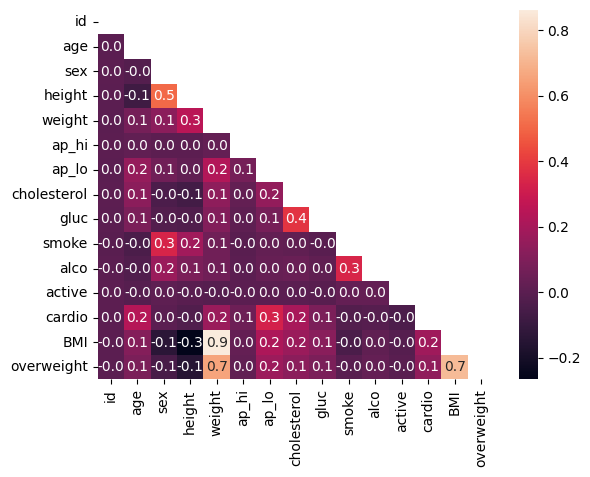

In [7]:
#draw the heatmap

corr_matr=df_cleaned.corr()
x=corr_matr.shape[0]
mask=np.triu(np.ones((x,x)),0)
sns.heatmap(corr_matr,mask=mask,annot=True,fmt='.1f')

In [8]:
melted=pd.melt(df_cleaned,id_vars=['id','age','sex','height','weight','ap_hi','ap_lo','cardio'],value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])
melted[['variable','cardio']].astype('category')

,variable,cardio
0,active,0
1,active,1
2,active,1
3,active,1
4,active,0
...,...,...
379549,smoke,1
379550,smoke,1
379551,smoke,0
379552,smoke,1


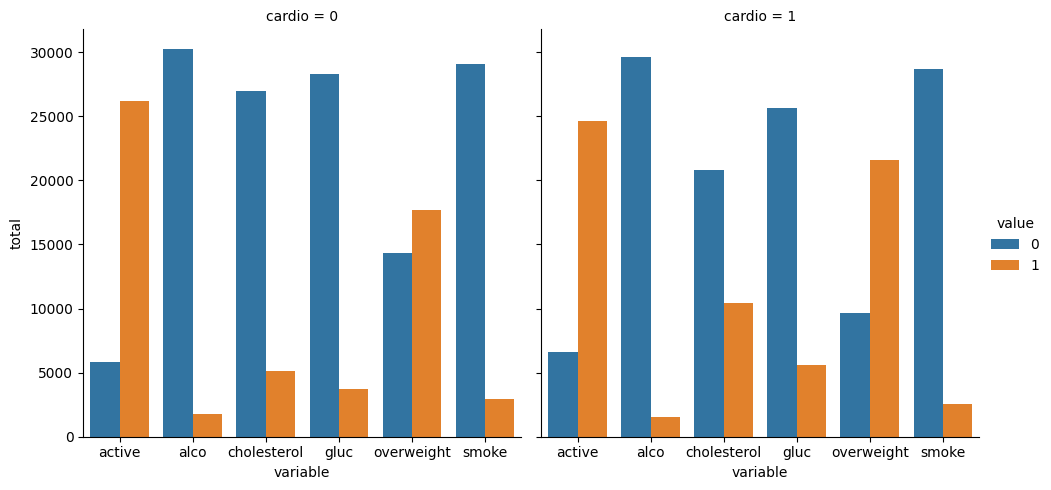

In [9]:
sns.catplot(data = melted, kind='count',  x='variable', hue='value', col='cardio').set(ylabel='total')